In [12]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from definitions import RAW_DATA_DIR
from src.models.strategies import RSIStoch200EMAResults

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
btcusdt = pd.read_csv(RAW_DATA_DIR / 'BTCUSDT.csv')
btcusdt.index = pd.DatetimeIndex(btcusdt['open time'])

In [21]:
from src.data.indicators import rsi

In [22]:
rsi_list = []
for index, row in btcusdt.iterrows():
    rsi_cur = rsi(
        ohlc=btcusdt[:index],
        period=14,
        
    )
    rsi_list.append(rsi_cur)

btcusdt['rsi'] = rsi_list

In [23]:
btcusdt['ema'] = np.random.normal(loc=4150, scale=50, size=btcusdt.shape[0])
btcusdt['stoch_k'] = np.random.uniform(low=0, high=1, size=btcusdt.shape[0])
btcusdt['stoch_d'] = np.random.uniform(low=0, high=1, size=btcusdt.shape[0])

results = RSIStoch200EMAResults(
    asset_name='BTCUSDT',
    ohlcv_timeseries=btcusdt
)

start_time = btcusdt.index[-150]
end_time = btcusdt.index[-1]

In [24]:
start_time

Timestamp('2021-05-28 21:00:00')

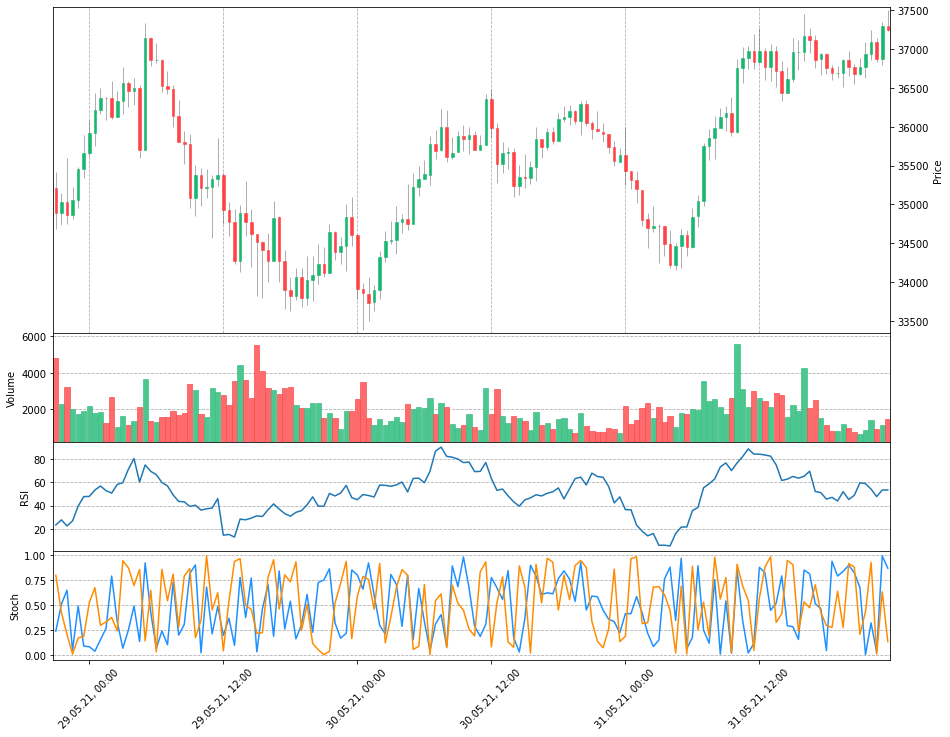

In [25]:
results.plot(start_time, end_time)